## Final Project - Time Series Analysis Model SARIMAX
## Mishandled Bag Ratio - US Airlines Industry


In [45]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
import seaborn as sns
import pylab as pl
import requests
from io import BytesIO

%matplotlib inline

In [46]:
#Read in data from source 
df= pd.read_csv("C:/Users/fcama/Desktop/MBR_DS_Proj/V8_HUB1_Bag_Perf.csv")
df.head()

,Year,Month,DOM,DOW,DOW2,Date,Numb_Passengers,Numb_Bags,MTD_Bags,Bag_Pass_Ratio,...,%(+/-),A0,D0,num_gate_chg,flight_div,flights_cancelled,cnl_mech,cnl_we,cnl_other,Misc_Reason
0,2016,Jan,1,F,5-F,1/1/2016,73717,58781,58781,0.797387,...,-24%,69.3,55.4,76,1,5,1,0,4,0
1,2016,Jan,2,J,6-J,1/2/2016,74144,67703,126484,0.913129,...,-17%,71.5,61.3,50,1,12,2,10,0,0
2,2016,Jan,3,S,7-S,1/3/2016,84940,72571,199055,0.854380,...,-12%,73.5,59.9,62,0,4,1,2,1,AM ABR TSA
3,2016,Jan,4,M,1-M,1/4/2016,79386,73744,272799,0.928930,...,-19%,75.9,63.7,58,0,8,8,0,0,0
4,2016,Jan,5,T,2-T,1/5/2016,71323,62199,334998,0.872075,...,-15%,74.0,68.0,31,0,2,0,2,0,0


In [47]:
df.tail()

,Year,Month,DOM,DOW,DOW2,Date,Numb_Passengers,Numb_Bags,MTD_Bags,Bag_Pass_Ratio,...,%(+/-),A0,D0,num_gate_chg,flight_div,flights_cancelled,cnl_mech,cnl_we,cnl_other,Misc_Reason
695,2017,Nov,26,S,7-S,11/26/2017,88961,64099,1474597,0.720529,...,-5%,81.1,76.7,38,1,3,3,0,0,NaN
696,2017,Nov,27,M,1-M,11/27/2017,85543,54564,1474597,0.637855,...,-5%,81.5,70.8,43,0,0,0,0,0,NaN
697,2017,Nov,28,T,2-T,11/28/2017,70720,54264,1528861,0.767308,...,-1%,84.9,70.0,36,0,0,0,0,0,NaN
698,2017,Nov,29,W,3-W,11/29/2017,66609,49295,1578156,0.740065,...,-7%,86.9,80.2,28,0,1,0,1,0,NaN
699,2017,Nov,30,Q,4-Q,11/30/2017,74675,52913,1631069,0.708577,...,0%,82.5,77.6,8,0,0,0,0,0,NaN


In [48]:
# change date format for time series analysis use
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [49]:
df.describe()

,Year,DOM,Numb_Passengers,Numb_Bags,MTD_Bags,Bag_Pass_Ratio,MTD_Bags.1,MBR_Day_Of,Count_Day_of,MBR_Goal,MBR,Met_Goal,A0,D0,flight_div,flights_cancelled,cnl_mech,cnl_we,cnl_other
count,700.000000,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,2016.477143,15.727143,76903.960000,58243.775714,9.166115e+05,0.759001,1.209927e+06,7.113886,543.954286,7.549957,8.157386,5.164286,67.285286,65.025429,1.722857,9.188571,1.907143,6.267143,1.001429
std,0.499834,8.803765,8137.296388,6468.071999,5.181378e+05,0.055788,6.852601e+05,3.843277,276.989767,1.602244,4.908786,21.960626,14.350315,13.400194,6.098176,23.220382,3.287590,20.358835,4.116855
min,2016.000000,1.000000,43274.000000,30939.000000,4.955800e+04,0.608756,6.378800e+04,2.730000,160.000000,4.200000,3.340000,0.000000,13.200000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,8.000000,71571.250000,54020.250000,4.709730e+05,0.725239,6.103290e+05,4.832500,380.000000,6.550000,5.392500,0.000000,61.700000,59.275000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2016.000000,16.000000,77903.500000,58436.500000,9.125240e+05,0.745331,1.213896e+06,6.165000,470.500000,7.400000,6.890000,1.000000,70.900000,68.600000,0.000000,2.500000,1.000000,0.000000,0.000000
75%,2017.000000,23.000000,82837.250000,62600.500000,1.352336e+06,0.783613,1.792098e+06,8.170000,632.250000,8.900000,9.215000,1.000000,77.500000,74.225000,1.000000,7.000000,2.000000,3.000000,1.000000
max,2017.000000,31.000000,98333.000000,77146.000000,2.001835e+06,1.009308,2.595067e+06,46.390000,2800.000000,10.400000,56.880000,123.000000,91.500000,87.000000,55.000000,241.000000,56.000000,214.000000,73.000000


In [50]:
df.shape

(700, 27)

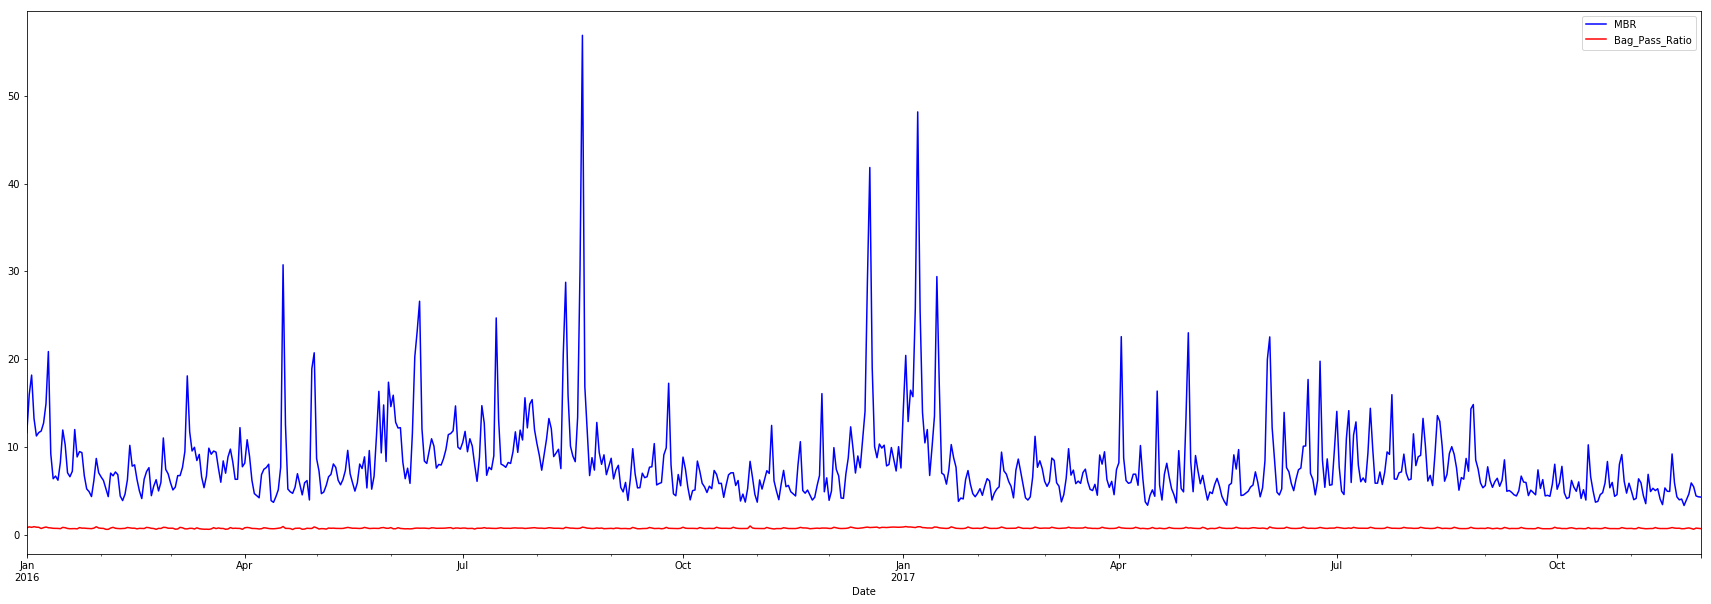

In [61]:
# Plot MBR over time
df[['MBR','Bag_Pass_Ratio']].plot(color=['blue', 'red'], figsize=(30,10))

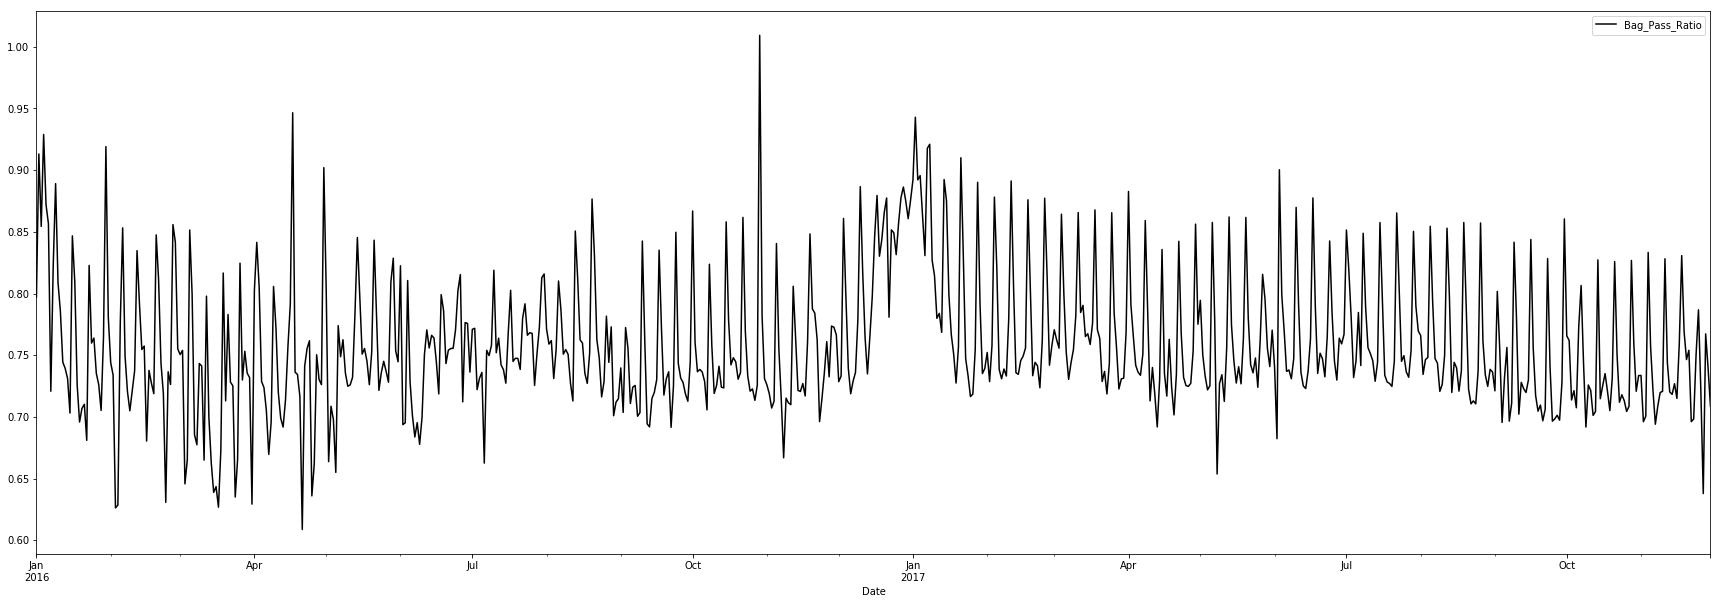

In [62]:
# Plot Bag to passenger ratio over time
df[['Bag_Pass_Ratio']].plot(color='black', figsize=(30,10))

In [63]:
df.MBR.autocorr(lag=1) # MBR Lag 1 

0.59001735015767875

In [64]:
df.MBR.autocorr(lag=2) # MBR Lag 2 

0.28103366965841675

## Autocorrection Plots
### We can plot the correlation coefficient for each lag variable.
The plot provides the lag number along the x-axis and the correlation coeeficient value between -1 and 1 on the y-axis.
The plot also includes a solid and dashed lines that indicate the 95% and 99% confidence interval for the ecorrelation values. Correlation values above these lines are more significant than those below the line providing a threshold or cutoff for selecting more relevant lag values.


C:\Users\fcama\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


[0, 20, -0.2, 0.65]

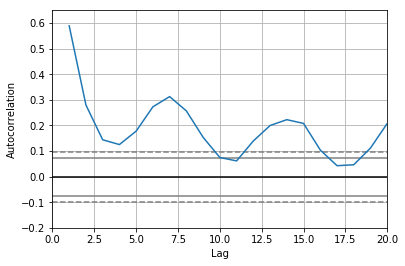

In [65]:
from pandas.tools.plotting import autocorrelation_plot

ax = autocorrelation_plot(df.MBR)
ax.axis([0,20,-.2,.65])

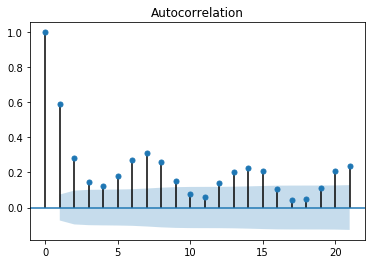

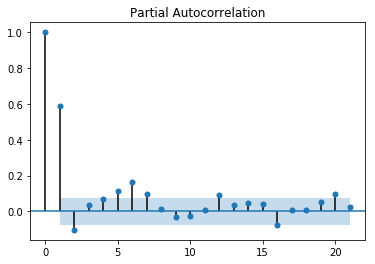

In [66]:
# Look at the plot as vertical line scatter plot.
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(df.MBR, lags=21)
plot_pacf(df.MBR, lags=21)
plt.show()

# Another useful statistic is the Augmented Dickey-Fuller test
The Augmented Dickey-Fuller test is a type of statistical test called a unit root test.
The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend.
There are a number of unit root tests and the Augmented Dickey-Fuller may be one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.
The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.


Null Hypothesis (H0): If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.


We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we accept the null hypothesis (non-stationary).
p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.
p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [176]:
from pandas import Series
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.MBR)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.785875
p-value: 0.000001
Critical Values:
	5%: -2.866
	1%: -3.440
	10%: -2.569


#### Spliting the MBR data in a training and test set - using 75% of the data for training & 25% for testing

In [68]:
n = len(df.MBR)
train = df.MBR[:int(.75*n)]
test = df.MBR[int(.75*n):]

In [69]:
print train.index.min()
print train.index.max()

2016-01-01 00:00:00
2017-06-08 00:00:00


In [70]:
print test.index.min()
print test.index.max()

2017-06-09 00:00:00
2017-11-30 00:00:00


2017-06-08 00:00:00


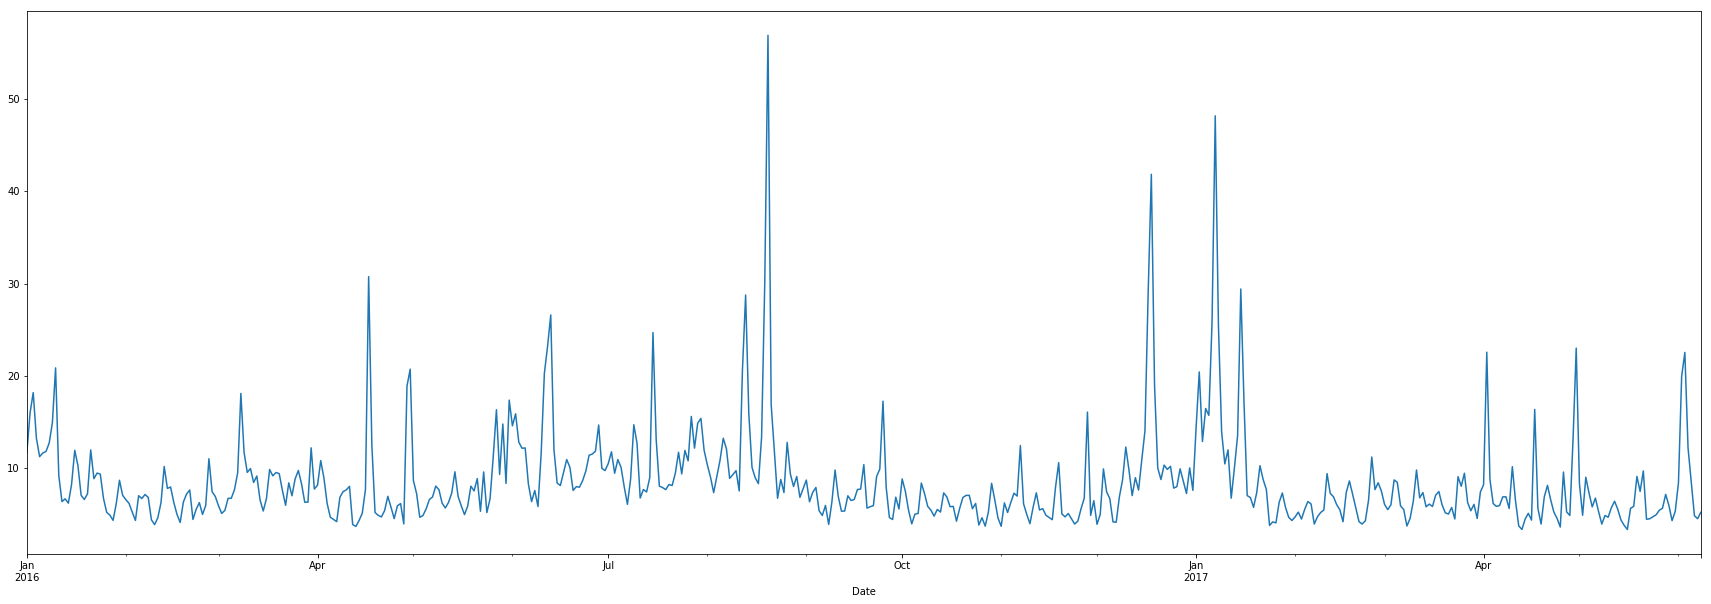

In [71]:
train.plot(figsize=(30,10))
print train.index.max()

In [72]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima_model import ARIMA

# ARIMA Time Series Model

In [162]:
# Variables
endog = df.loc['2016-01-01':'2017-11-30', 'MBR']
exog = sm.add_constant(df.loc['2016-01-01':'2017-11-30', 'Bag_Pass_Ratio'])

# Fit the model
mod = sm.tsa.statespace.SARIMAX(endog, exog, order=(1,0,7),  seasonal_order=(1,1,1,52),  simple_differencing=False)
res = mod.fit(disp=False)
res.summary()

C:\Users\fcama\Anaconda2\lib\site-packages\statsmodels\base\model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                MBR   No. Observations:                  700
Model:             SARIMAX(1, 0, 7)x(1, 1, 1, 52)   Log Likelihood               -1836.023
Date:                            Tue, 05 Dec 2017   AIC                           3698.046
Time:                                    12:40:23   BIC                           3757.210
Sample:                                01-01-2016   HQIC                          3720.916
                                     - 11-30-2017                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0004   6662.609   5.28e-08      1.000   -1.31e+04    1.31e+04
Bag_Pass_Ratio    22.0118      2.969      7.413      0.000      16.192      27.832
ar.L1              0.9977      0.035     28.308      0.000       0.929       1.067
ma.L1             -0.4563      0.028    -16.560      0.000      -0.510      -0.402
ma.L2             -0.3159      0.052     -6.072      0.000      -0.418      -0.214
ma.L3             -0.1260      0.053     -2.384      0.017      -0.230      -0.022
ma.L4             -0.0181      0.060     -0.302      0.763      -0.136       0.099
ma.L5              0.0059      0.054      0.110      0.912      -0.099       0.111
ma.L6              0.0196      0.050      0.387      0.698      -0.079       0.118
ma.L7             -0.0060      0.040     -0.151      0.880      -0.084       0.072
ar.S.L52          -0.0797      0.046     -1.726      0.084      -0.170       0.011
ma.S.L52          -0.9999     60.428     -0.017      0.987    -119.436     117.436
sigma2            13.6053    821.705      0.017      0.987   -1596.907    1624.118
===================================================================================
Ljung-Box (Q):                       52.10   Jarque-Bera (JB):              5063.94
Prob(Q):                              0.10   Prob(JB):                         0.00
Heteroskedasticity (H):               0.48   Skew:                             2.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [174]:
# multi-step out-of-sample forecast
forecast = model_fit.forecast(steps=7)[0]

NameError: name 'model_fit' is not defined

In [164]:
# In-sample one-step-ahead predictions
predict = res.get_prediction()
predict_ci = predict.conf_int()

In [165]:
# Dynamic predictions
predict_dy = res.get_prediction(dynamic=365)
predict_dy_ci = predict_dy.conf_int()
predict_dy

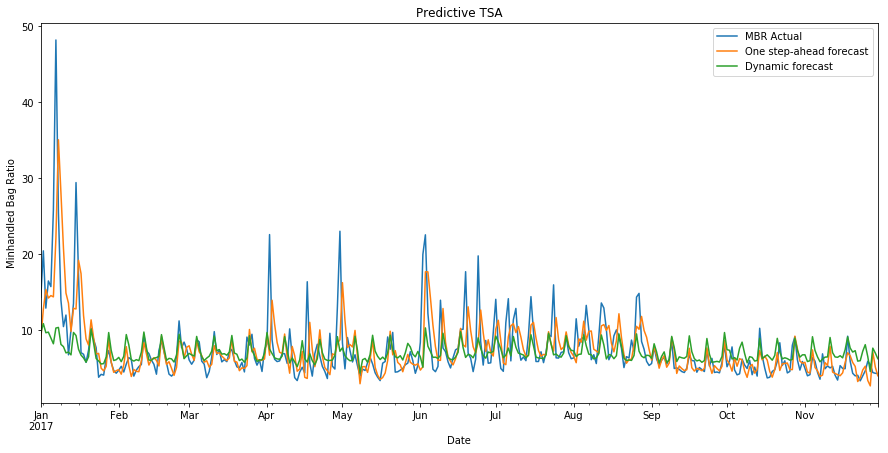

In [166]:
# Graph
fig, ax = plt.subplots(figsize=(15,7))
npre = 4
ax.set(title='Predictive TSA', xlabel='Date', ylabel='Minhandled Bag Ratio')

# Plot data points
df.loc['2017-01-01':'2018-03-31', 'MBR'].plot(ax=ax, label='MBR Actual')

# Plot predictions
predict.predicted_mean.loc['2017-01-01':'2018-03-31'].plot(ax=ax, label='One step-ahead forecast')
ci = predict_ci.loc['2017-12-31':'2018-03-31']

predict_dy.predicted_mean.loc['2017-01-01':'2018-03-31'].plot(ax=ax, label='Dynamic forecast')
ci = predict_dy_ci.loc['2017-01-01':'2018-03-31']


legend = ax.legend(loc='upper right')

C:\Users\fcama\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()
C:\Users\fcama\Anaconda2\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
C:\Users\fcama\Anaconda2\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp

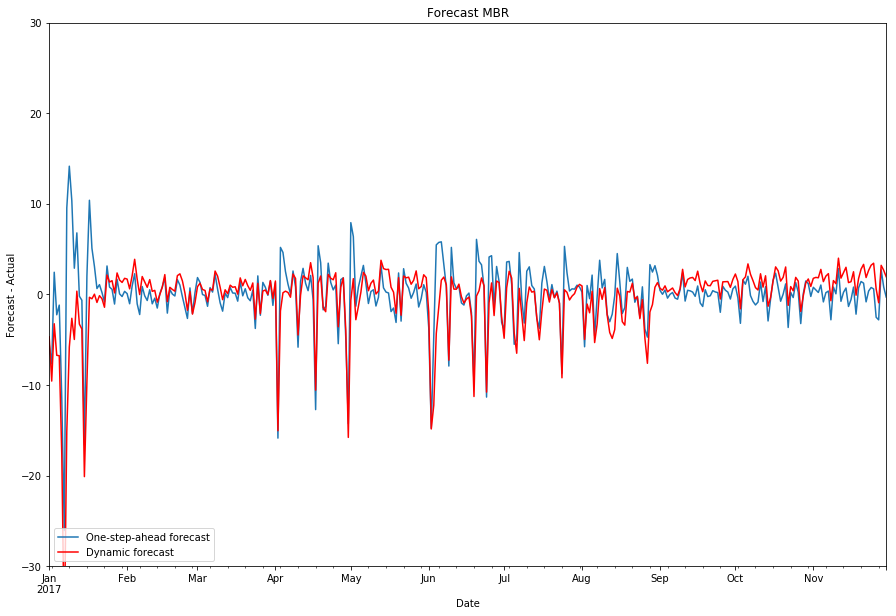

In [167]:
# Prediction error

# Graph
fig, ax = plt.subplots(figsize=(15,10))
ax.axis([0,50,-30,30])
npre = 4
ax.set(title='Forecast MBR', xlabel='Date', ylabel='Forecast - Actual')

# In-sample one-step-ahead predictions and 95% confidence intervals
predict_error = predict.predicted_mean - endog
predict_error.ix['2017-01-01':'2018-12-31'].plot(ax=ax, label='One-step-ahead forecast')
ci = predict_ci.ix['2017-01-01':'2018-12-31'].copy()
ci.iloc[:,0] -= endog.loc['2017-01-01':'2018-12-31']
ci.iloc[:,1] -= endog.loc['2017-01-01':'2018-12-31']
ax.fill_between(ci.index, ci.ix[:,0], ci.ix[:,1], alpha=0.1)

# Dynamic predictions and 95% confidence intervals
predict_dy_error = predict_dy.predicted_mean - endog
predict_dy_error.ix['2017-01-01':'2018-12-31'].plot(ax=ax, style='r', label='Dynamic forecast')
ci = predict_dy_ci.ix['2017-01-01':'2018-12-31'].copy()
ci.iloc[:,0] -= endog.loc['2017-01-01':'2018-12-31']
ci.iloc[:,1] -= endog.loc['2017-01-01':'2018-12-31']
ax.fill_between(ci.index, ci.ix[:,0], ci.ix[:,1], color='r', alpha=0.1)

legend = ax.legend(loc='lower left');
legend.get_frame().set_facecolor('w')

In [168]:
predict_ci.tail()

,lower MBR,upper MBR
2017-11-26,NaN,NaN
2017-11-27,NaN,NaN
2017-11-28,NaN,NaN
2017-11-29,NaN,NaN
2017-11-30,NaN,NaN


In [169]:
#Read in data from source 
df_g= pd.read_csv("C:/Users/fcama/Desktop/MBR_DS_Proj/goals_18.csv")
df_g.tail(12)

,month_year,MBR_goal
48,1/1/2018,9.43
49,2/1/2018,6.49
50,3/1/2018,6.45
51,4/1/2018,6.26
52,5/1/2018,6.63
53,6/1/2018,8.09
54,7/1/2018,7.53
55,8/1/2018,8.08
56,9/1/2018,4.86
57,10/1/2018,4.96
